**Модель YOLO для обнаружения объектов на изображениях**

# А. Использование предобученной модели

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.5/921.5 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 75.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 873.6 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 56.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninsta

In [ ]:
import ultralytics

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
from ultralytics import YOLO

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
model = YOLO("yolo11n.pt") # загружаем предобученную модель yolo 11 версии

100%|██████████| 5.35M/5.35M [00:00<00:00, 87.8MB/s]


In [ ]:
results = model('/content/drive/MyDrive/4 курс/Компьютерное зрение/картинка.jpg') # выполняем предсказание объектов на изображении


image 1/1 /content/drive/MyDrive/4 курс/Компьютерное зрение/картинка.jpg: 352x640 1 cat, 1 dog, 310.1ms
Speed: 15.4ms preprocess, 310.1ms inference, 33.5ms postprocess per image at shape (1, 3, 352, 640)


Обнаружены: один кот и одна собака

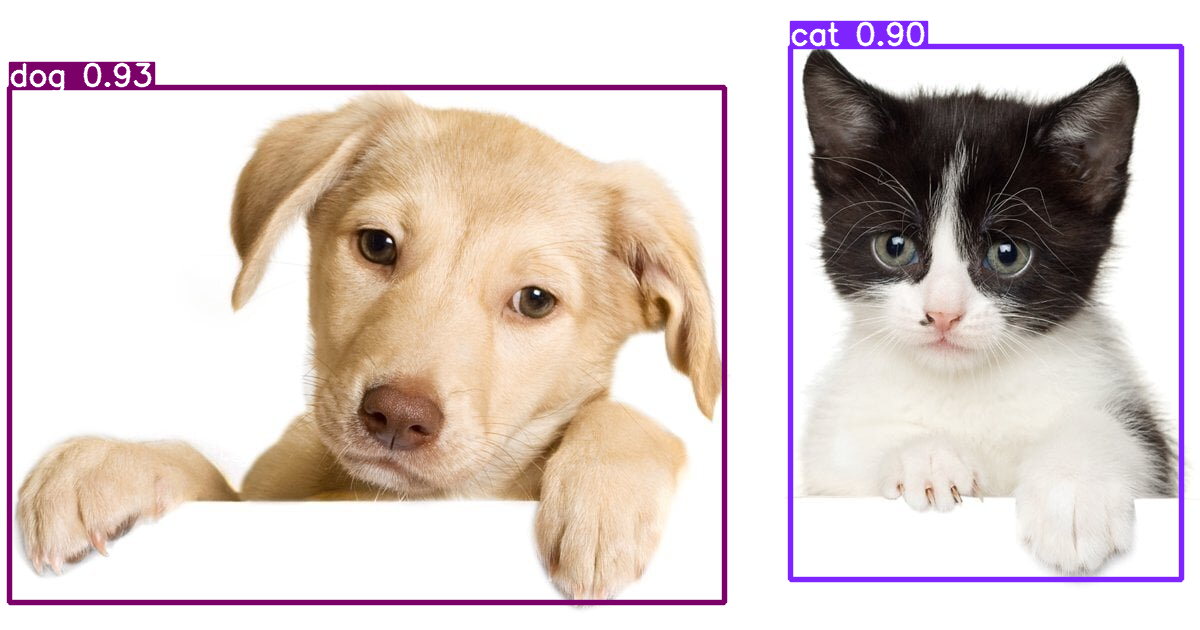

In [ ]:
result=results[0]
result.show() # отображаем изображение с рамками

In [ ]:
# Извлекаем информацию о предсказаниях
classes = result.boxes.cls.cpu().numpy()       # id классов
confidences = result.boxes.conf.cpu().numpy()  # уверенность
bboxes = result.boxes.xyxy.cpu().numpy()       # коррдинаты углов рамок

for i in range(len(classes)):
    print("\nОбнаруженный объект", i + 1)
    print("- Класс:", model.names[classes[i]])
    print("- Левый верхний угол: {:.2f}, {:.2f}".format(bboxes[i][0], bboxes[i][1]))
    print("- Правый нижний угол: {:.2f}, {:.2f}".format(bboxes[i][2], bboxes[i][3]))
    print("- Уверенность:", round(confidences[i] * 100, 2), "%")


Обнаруженный объект 1
- Класс: dog
- Левый верхний угол: 9.80, 87.66
- Правый нижний угол: 724.96, 602.19
- Уверенность: 93.44 %

Обнаруженный объект 2
- Класс: cat
- Левый верхний угол: 790.65, 46.26
- Правый нижний угол: 1181.92, 579.75
- Уверенность: 89.51 %


# B. Подготовьте свой набор изображений железнодорожных вагонов, выполнив разметку с помощью Roboflow.

Вместе с Коневым Виктором и Ясыревым Михаилом размечали 209 картинок из исходного набора изображений. https://universe.roboflow.com/wagons-7juqb/wagons-xk0cl

#C. Обучите модель YOLO обнаруживать аннотированные части у вагонов в полученном наборе данных.#

In [ ]:
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.1/83.1 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [ ]:
# Инициализация соединения с платформой Roboflow
from roboflow import Roboflow
rf = Roboflow(api_key="Xj4amX4Ant0GTxlSZurb")
project = rf.workspace("cv-390lk").project("test-0kyke") # получаем доступ к проекту
version = project.version(2)
dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to test-2 in yolov11:: 100%|██████████| 4786/4786 [00:01<00:00, 2493.96it/s]


In [ ]:
from ultralytics import YOLO
model = YOLO('yolo11n.pt') # загружаем модель из файла

In [ ]:
results = model.train(
   data='/content/test-2/data.yaml',
   imgsz=640,
   epochs=20,
   lr0=0.001,
   name='yolov11m_vagons'
)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Чтение CSV файла с результатами обучения
df = pd.read_csv('/content/runs/detect/yolov11m_vagons/results.csv')

# Получаем номера эпох и значения метрики precision
epochs = df['epoch']
precision = df['metrics/precision(B)']

# Построение графика
plt.figure(figsize=(15, 8))
plt.plot(epochs, precision, marker='o', label='Precision')

# Настройка графика
plt.title('Изменение точности на валидационной выборке в зависимости от эпохи обучения')
plt.xlabel('Эпоха')
plt.ylabel('Точность (Precision)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
best_model = YOLO('/content/runs/detect/yolov11m_vagons/weights/best.pt')
best_model.names

In [ ]:
import random
import os

# Путь к папке с изображениями
folder_path = '/content/test-2/test/images/'

# Выбираем 5 случайных изображений
random_image_paths = random.sample(os.listdir(folder_path), 5)

# Выполнение предсказания и отображение результатов
results = model([os.path.join(folder_path, img) for img in random_image_paths])
for result in results:
    result.show()